In [10]:
# Cell 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model


In [11]:
# Cell 2: Load dataset
df = pd.read_csv("C:/Users/lenovo/Downloads/salary_prediction/adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
# Cell 3: Basic Data Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace("-", "_").str.replace(" ", "_")


In [13]:
# Cell 4: Label Encoding
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

joblib.dump(label_encoders, "label_encoders.pkl")
print("label_encoders.pkl has been regenerated with the following keys:")
print(label_encoders.keys())


label_encoders.pkl has been regenerated with the following keys:
dict_keys(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income'])


In [14]:
# Cell 5: Feature/Target split
X = df.drop("income", axis=1)
y = df["income"]



In [15]:
# Cell 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [16]:
# Cell 7: Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer first
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Cell 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7998 - loss: 0.4175 - val_accuracy: 0.8403 - val_loss: 0.3383
Epoch 2/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8385 - loss: 0.3419 - val_accuracy: 0.8388 - val_loss: 0.3348
Epoch 3/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8470 - loss: 0.3310 - val_accuracy: 0.8431 - val_loss: 0.3329
Epoch 4/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8456 - loss: 0.3344 - val_accuracy: 0.8452 - val_loss: 0.3320
Epoch 5/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8486 - loss: 0.3244 - val_accuracy: 0.8406 - val_loss: 0.3325
Epoch 6/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8484 - loss: 0.3256 - val_accuracy: 0.8408 - val_loss: 0.3309
Epoch 7/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8456 - loss: 0.3288 - val_accuracy: 0.8411 - val_loss: 0.3349
Epoch 8/20
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8500 - loss: 0.3235 - 

In [19]:
# Cell 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8535 - loss: 0.3123
Test Accuracy: 0.86


306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


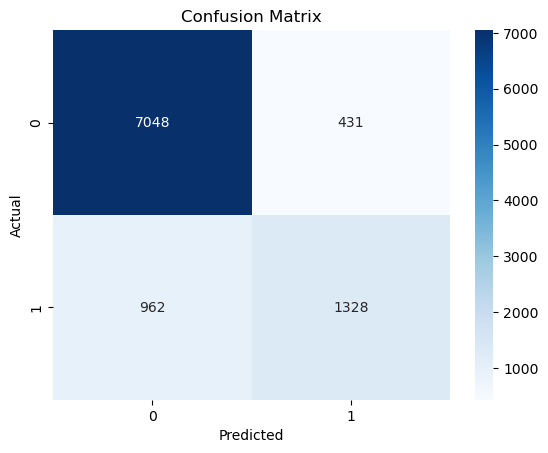

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7479
           1       0.75      0.58      0.66      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [20]:
# Cell 10: Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


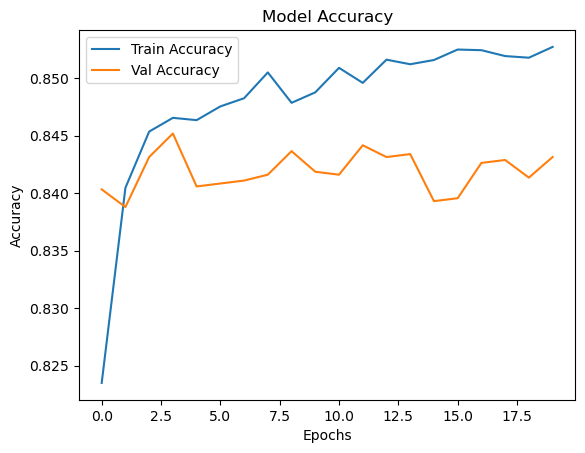

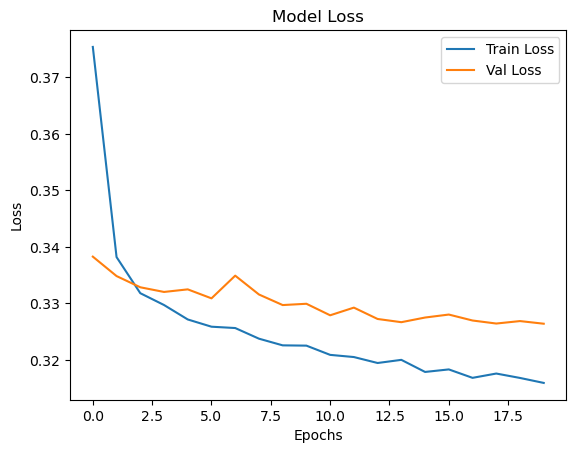

In [21]:
# Cell 11: Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [22]:
model.save("salary_prediction_model.keras")
